# Introduction:

Weather prediction is a crucial aspect of daily life, affecting everything from agriculture to transportation to emergency preparedness. While traditional forecasting methods have come a long way, there is still much room for improvement in accuracy and efficiency. In recent years, machine learning (ML) has emerged as a promising approach to weather prediction. By leveraging the vast amounts of data collected from weather stations around the world, ML models can analyze complex patterns and relationships to make more accurate and timely predictions.

In this research paper, we explore the application of ML to weather prediction. Specifically, we focus on the use of supervised learning algorithms, including decision trees, logistic regression, and k-nearest neighbors, to predict weather conditions based on historical data. We use a dataset containing daily weather measurements from multiple weather stations in a particular region and train our ML models on this data to predict future weather conditions.

Our research aims to address several key questions, including: What types of ML algorithms are best suited for weather prediction? How does the size and quality of the training dataset affect the accuracy of the predictions? What features or variables have the most significant impact on weather prediction accuracy? By answering these questions, we hope to shed light on the potential of ML for weather prediction and provide insights into best practices for using these technologies in real-world applications.

Overall, this research has the potential to make a significant contribution to the field of weather prediction and inform future research in this area. By demonstrating the effectiveness of ML for predicting weather conditions, we hope to inspire further exploration and innovation in this important domain.

*   In this report, we will use the "seattle-weather.csv" dataset from Kaggle to analyze and build predictive models of weather conditions based on accompanying conditions. This is a set of weather data in the US state of Seattle recorded on a daily basis for about 4 years, includes weather conditions such as observed date, high and low temperature, precipitation, speed wind and weather conditions of the day associated with those conditions. [Link dataset from Kaggle](https://www.kaggle.com/datasets/ananthr1/weather-prediction)

*   Models used: Logistic Regression, Decision Tree, K-Nearest Neighbor Classifier (KNN).

# **Import Library**

imports necessary libraries such as numpy, pandas, seaborn, etc. for data manipulation, visualization, statistical analysis, and machine learning.

In [222]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ** Understanding the dataset **

In [223]:
# Load the CSV file into a DataFrame
data = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
print(data.head())


         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [224]:
# Print the dimensions of the DataFrame
print(data.shape)


(1461, 6)


There are **6 columns** with a total of **1461 rows** according to the observations in the dataset

In [225]:
# Print information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


There are **6 variables** corresponding to 6 columns in the dataset:
* 4 variables indicating weather conditions including: `precipitation`, `temp_max`, `temp_min`, `wind`
* 1 variable to record date information: `date` has the form YYYY-MM-DD
* 1 variable indicating weather condition: `weather`

* The variable `precipitation` indicates the precipitation information of all forms of water falling to the ground such as rain, hail, snowfall or drizzle.
* The `temp_max` variable indicates the highest temperature of the day.
* The `temp_min` variable indicates the lowest temperature of the day.
* The `wind` variable stores wind speed information for the day.
* the `weather` defines the weather of the day

##  Visualizing the dataset

In this step, we will conduct the analysis of the variables in the data set that we have collected above.

First, we will start from the variable `weather` with the weather classification conditions.

/tmp/ipykernel_13761/2872050081.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='weather_encoded', data=data, palette='hls')
/tmp/ipykernel_13761/2872050081.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(weather_names.keys()))


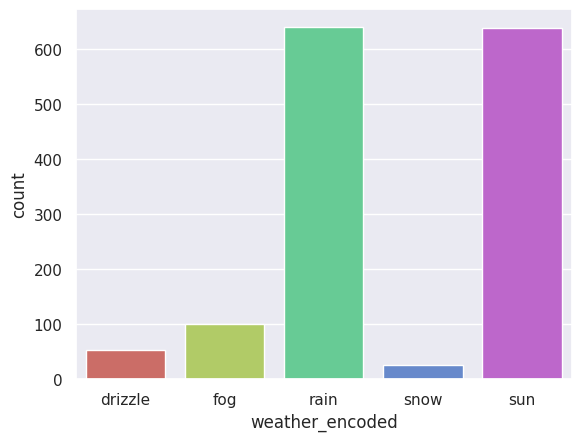

In [226]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded into a DataFrame called data

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
data['weather_encoded'] = le.fit_transform(data['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))

# Plot the count of each unique value in the weather column with actual names on the labels
ax = sns.countplot(x='weather_encoded', data=data, palette='hls')

# Set the x-axis tick labels using the dictionary
ax.set_xticklabels(list(weather_names.keys()))

# Display the plot
plt.show()


In [227]:
# Get the value counts of each unique value in the weather column
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")


Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


* From the above graph and analysis, we can see that our dataset contains mostly `rain` and `sun` weather conditions with more than 600 data lines and is approximately the same when accounting for 43.3% of the set. data. For weather conditions such as `snow`, `fog` and `drizzle` there are less than 100 data lines when less than 10% of the dataset.
* General comment: Since there is little data about `snow`, `fog` and `drizzle`, this can affect the accuracy of the model when predicting snow, fog and drizzle weather conditions. when too little data to train.

Next, we will learn about the variables that play the role of weather conditions in the dataset, including: `precipitation`, `temp_max`, `temp_min`, `wind`

In [228]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


We view the distribution of the value variables using the ***Histogram.*** graph.

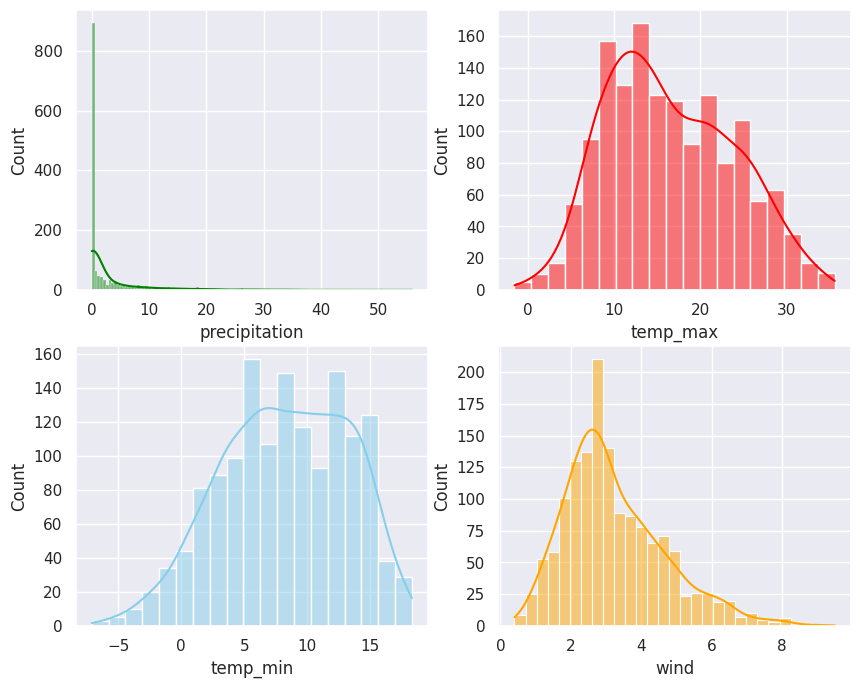

In [229]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])


* From the graphs above, it is clear that the distribution of `precipitation`, `wind` and has **positively skewed (right skewed)**. The right tail is longer than the left tail.
* The distribution of `temp_min` has **negative skewness (left skewed)**
* And both have some **outliers.**

## USING BOXPLOT TO FIND EXTERNAL VALUE AND DIVILITY OF CONDITION VALUES


/tmp/ipykernel_13761/3600717101.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)


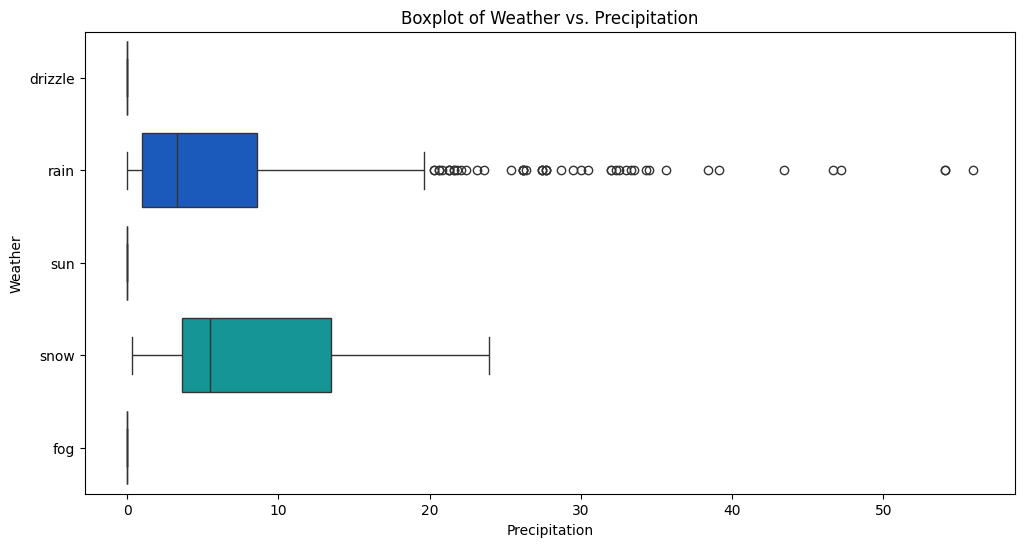

In [230]:
# Use a context manager to apply the default style to the plot
with plt.style.context('default'):
    
    # Create a figure with the specified size and an axis object
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot a boxplot with the given data, using the specified x and y variables, color palette, and axis object
    sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)
    
    # Optional: set axis labels and title if desired
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation') 


From the boxplot between `weather` and `precipitation` above, the value of `rain` has many positive outliers, and both `rain` and `snow` are right-skewed/positively skewed.

/tmp/ipykernel_13761/4085889016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)


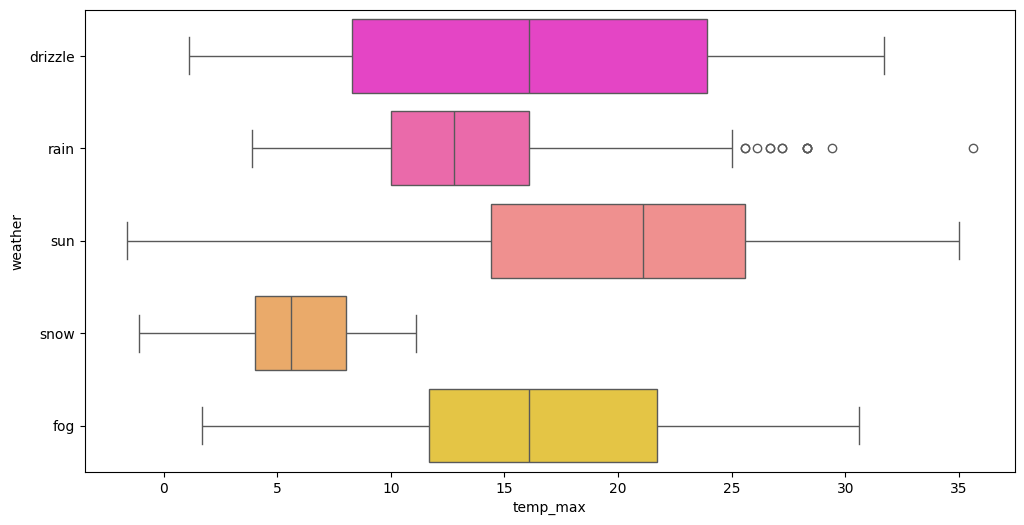

In [231]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)


/tmp/ipykernel_13761/4058417402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


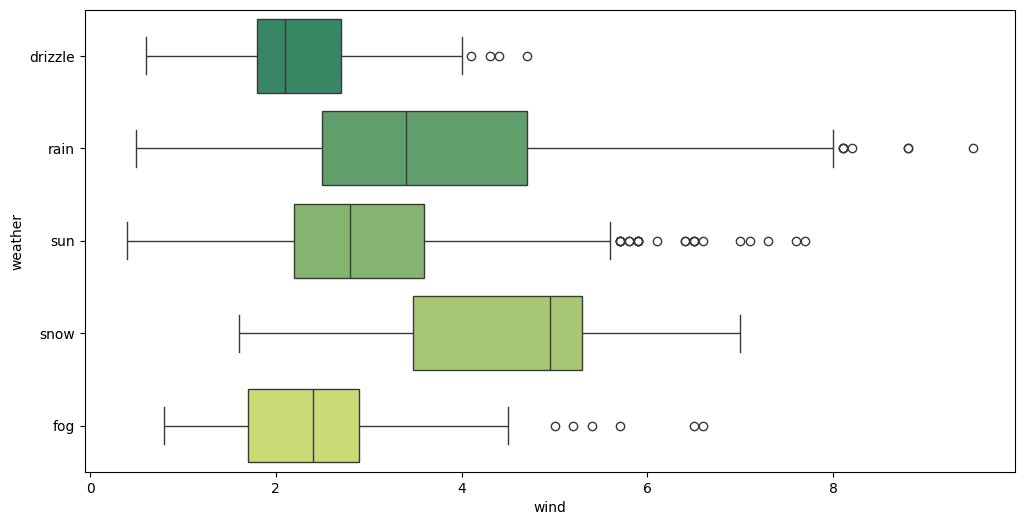

In [232]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


From the boxplots above, we see that each attribute of `weather` has some positive outliers and also includes both left and right offsets.

/tmp/ipykernel_13761/950541548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


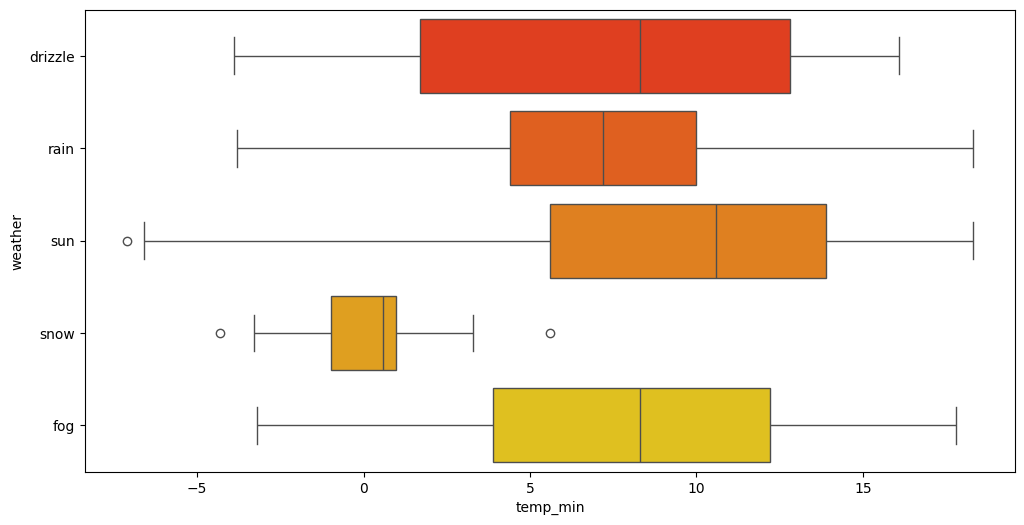

In [233]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


Observed from the boxplot between `weather` and `temp_min`, we see that the weather condition `sun` has negative outliers and `snow` has both negative and positive outliers, where `snow` is skewed to the left.

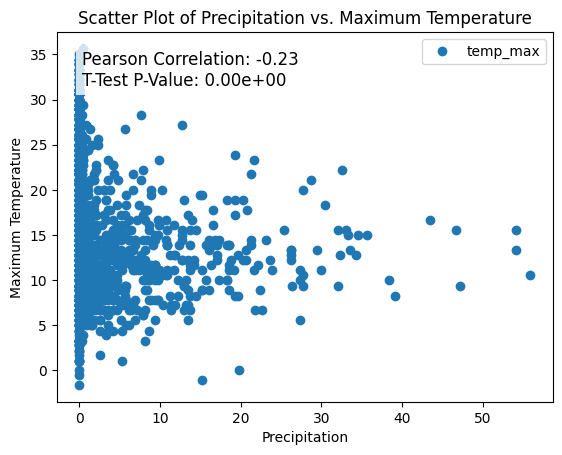

In [234]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):
    
    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("precipitation", "temp_max", style='o')
    
    # Add a title to the plot
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')
    
    # Add labels to the x and y axes
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')
    
    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))


[Text(0.5, 1.0, 'Scatter plot of Wind vs. Maximum Temperature')]

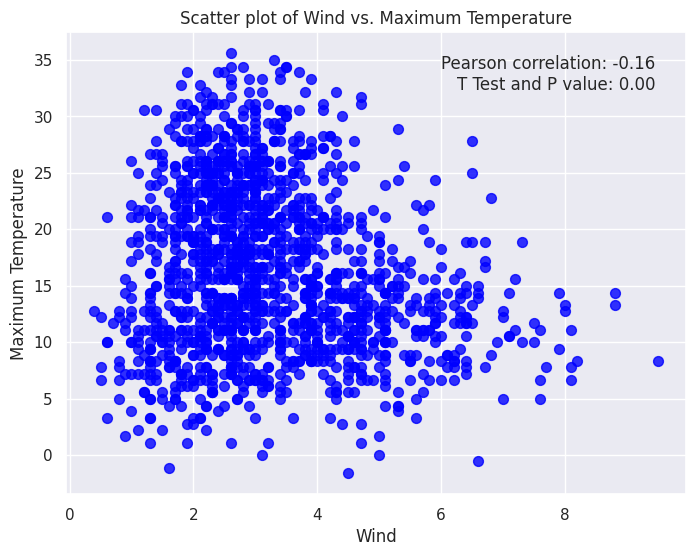

In [235]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["wind"], y=data["temp_max"], marker='o', s=50, alpha=0.8, color='blue')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["wind"], data["temp_max"])[0, 1], np.mean(np.abs(stats.ttest_ind(data["wind"], data["temp_max"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind', ylabel='Maximum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind vs. Maximum Temperature')


* According to the results of t-test and the calculated p-value is zero from above, it proves that the hypothesis H0 in the respective variables is rejected and the above variables are all statistically significant and have an influence on the results. forecast.

* At the same time, we also see that the correlation coefficient between the above pairs of variables is in the range -1 < r < 0, this means that they have a weak correlation with each other or have a negative correlation coefficient and they are not. have a linear relationship with each other. That is, the value of variable x increases, the value of variable y decreases and vice versa, the value of variable y increases, the value of variable x decreases.

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

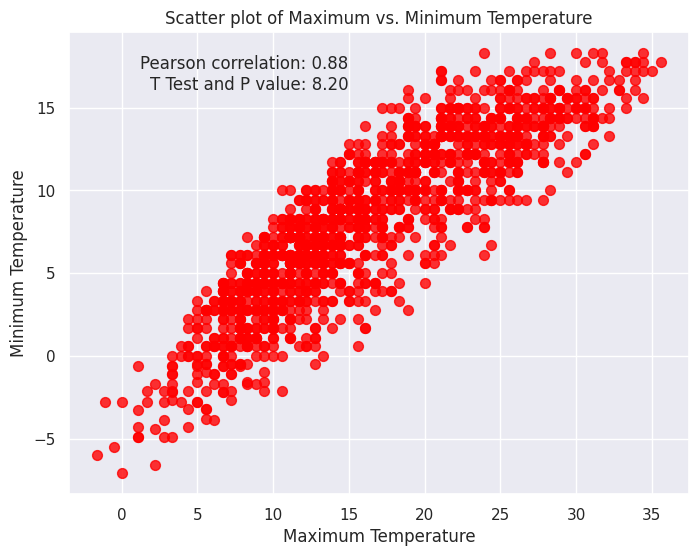

In [236]:

# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["temp_max"], data["temp_min"])[0, 1], np.mean(np.abs(np.subtract(data["temp_max"], data["temp_min"])))

# Display the correlation and p-value on the plot
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')


Based on the above graph, we can comment that the variable `temp_min` and the variable `temp_max` have a positive relationship with each other and this linear relationship is quite strong with a correlation coefficient of 0.87 close to 1. That is, the value of variable x increases, the value of variable y increases and vice versa, the value of variable y increases, the value of variable x also increases.

## HANDLING NULL VALUES

In [237]:
# Find the total number of null values in each column
null_count = data.isnull().sum()

# Print the number of null values in each column
print(null_count)


date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
weather_encoded    0
dtype: int64



By looking above details, we can conclude that there are no NULL values ​​in the condition variables because the columns all have 1461 observations that are exactly the same as the number of rows of the data.

# **2.DATA PROCESSING AND CLEANING:**

The first assumption here is that in this data set, the variable `date` is an unnecessary data variable that does not need to be used, does not affect the results in the process of building our predictive models. we. So in the first case, we will proceed to remove this variable from the dataset.

In [238]:
# Drop the "date" column from the dataframe
df = data.drop("date", axis=1)

# Display the first 5 rows of the resulting dataframe
df.head()


,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


## 2.2. REMOVED OUTLIER POINTS AND INFINITE VALUES

* Since the above dataset contains outliers, we will remove them to make the dataset more uniform.

* We remove the Outlier points by calculating the interquartile range, then remove the values ​​outside the range (Q1-1.5*IQR, Q3+1.5*IQR). Points outside this range are called outliers.

In [239]:
# Select only numeric columns for quartile calculation and outlier removal
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers using the IQR method
df = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

# Print the resulting DataFrame after outlier removal
print(df)

      precipitation  temp_max  temp_min  wind  weather  weather_encoded
0               0.0      12.8       5.0   4.7  drizzle                0
2               0.8      11.7       7.2   2.3     rain                2
4               1.3       8.9       2.8   6.1     rain                2
5               2.5       4.4       2.2   2.2     rain                2
6               0.0       7.2       2.8   2.3     rain                2
...             ...       ...       ...   ...      ...              ...
1455            0.0       4.4       0.0   2.5      sun                4
1457            1.5       5.0       1.7   1.3     rain                2
1458            0.0       7.2       0.6   2.6      fog                1
1459            0.0       5.6      -1.0   3.4      sun                4
1460            0.0       5.6      -2.1   3.5      sun                4

[1233 rows x 6 columns]


## 2.3. HANDLING DIFFERENT DISTRIBUTIONS

We treat two variables with skewed distribution, “precipition” and “wind” by
take their square root.

In [240]:
# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])


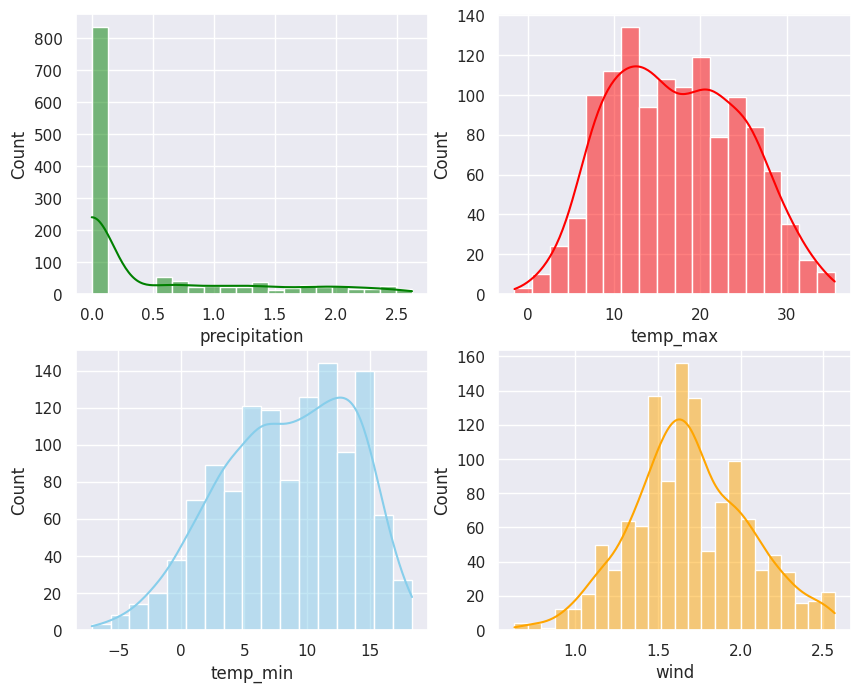

In [241]:
# set the plot style to darkgrid
sns.set(style="darkgrid")

# create a 2x2 subplot grid with a specified size
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# loop through each column and its index in the dataframe
for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):
    
    # create a histogram plot for the current column, with a kernel density estimate
    # set the current axis to the appropriate subplot in the grid
    # set the color of the histogram based on the index of the current column
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])


In [242]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.000000,12.8,5.0,2.167948,drizzle,0
2,0.894427,11.7,7.2,1.516575,rain,2
4,1.140175,8.9,2.8,2.469818,rain,2
5,1.581139,4.4,2.2,1.483240,rain,2
6,0.000000,7.2,2.8,1.516575,rain,2


In [243]:
#we no longer need weather column 
if "weather" in df.columns:
    df = df.drop("weather", axis=1)


x = ((df.loc[:,df.columns!="weather_encoded"]).astype(int)).values[:,0:]
y = df["weather_encoded"].values

In [244]:
df.weather_encoded.unique()

array([0, 2, 4, 3, 1])

In [245]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

We divide the dataset into two separate data sets including the training dataset and the test dataset with the corresponding ratio of 9:1 (this ratio is divided based on the number of data lines of the dataset). initial).

# **3.MODEL TRAINING:**

## 3.1. K-NEAREST NEIGHBOR CLASSIFIER.

In [246]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# calculate the accuracy score of the KNN classifier on the test data
knn_score = knn.score(x_test, y_test)
print("KNN Accuracy:", knn_score)


KNN Accuracy: 0.75


In [247]:
# use the KNN classifier to predict the labels of the test data
y_pred_knn = knn.predict(x_test)

# create a confusion matrix of the KNN classifier's predictions
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrix
print("Confusion Matrix")
print(conf_matrix)


Confusion Matrix
[[ 0  0  0  0  1]
 [ 0  2  4  0  5]
 [ 1  0 26  0  6]
 [ 0  0  1  1  1]
 [ 1  5  6  0 64]]


In [248]:
# print classification report for KNN
print('KNN Classification Report\n')
# set zero_division parameter to 0 to avoid warning in case of empty classes
print(classification_report(y_test, y_pred_knn, zero_division=0))


KNN Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.18      0.22        11
           2       0.70      0.79      0.74        33
           3       1.00      0.33      0.50         3
           4       0.83      0.84      0.84        76

    accuracy                           0.75       124
   macro avg       0.56      0.43      0.46       124
weighted avg       0.75      0.75      0.74       124



## 3.2. DECISION TREE.

We proceed to build a model with different max_depth parameters from 1 to 7 to find the model with the best accuracy.

In [249]:
# Import the DecisionTreeClassifier from Scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define a range of maximum depths to try
max_depth_range = range(1, 8)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current maximum depth, maximum number of leaf nodes, and a random seed
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
  
    # Fit the DecisionTreeClassifier on the training data
    dec.fit(x_train, y_train)
  
    # Calculate the accuracy of the DecisionTreeClassifier on the test data
    dec_score = dec.score(x_test, y_test)
  
    # Print the accuracy of the DecisionTreeClassifier for the current maximum depth
    print(f"Decision Tree Accuracy with max depth {depth}: {dec_score}")


Decision Tree Accuracy with max depth 1: 0.8064516129032258
Decision Tree Accuracy with max depth 2: 0.8145161290322581
Decision Tree Accuracy with max depth 3: 0.8225806451612904
Decision Tree Accuracy with max depth 4: 0.8145161290322581
Decision Tree Accuracy with max depth 5: 0.8306451612903226
Decision Tree Accuracy with max depth 6: 0.8306451612903226
Decision Tree Accuracy with max depth 7: 0.8306451612903226


We find that with max_depth between 2,6 and 7 we get the best Decision Tree model with 0.8225 confidence.

In [250]:
# Use the DecisionTreeClassifier to predict classes for the test data
y_pred_dec = dec.predict(x_test)

# Calculate the confusion matrix using the predicted and actual classes
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 0  0  0  0  1]
 [ 0  0  0  0 11]
 [ 0  0 25  0  8]
 [ 0  0  0  3  0]
 [ 0  0  1  0 75]]


In [251]:
print('Decision Tree\n',classification_report(y_test,y_pred_dec, zero_division=0))

Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.96      0.76      0.85        33
           3       1.00      1.00      1.00         3
           4       0.79      0.99      0.88        76

    accuracy                           0.83       124
   macro avg       0.55      0.55      0.54       124
weighted avg       0.76      0.83      0.79       124



## 3.3. LOGISTIC REGRESSION

In [252]:
# Import the LogisticRegression class from Scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lg.fit(x_train, y_train)

# Calculate the accuracy of the Logistic Regression classifier on the test data
lg_score = lg.score(x_test, y_test)

# Print the accuracy of the Logistic Regression classifier
print(f"Logistic Regression Accuracy: {lg_score}")


Logistic Regression Accuracy: 0.8064516129032258


/home/yankee/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [253]:
# Use the trained Logistic Regression classifier to predict labels for the test data
y_pred_lg = lg.predict(x_test)

# Compute the confusion matrix for the predicted labels and the true labels
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 0  0  0  0  1]
 [ 0  0  3  0  8]
 [ 0  0 26  0  7]
 [ 0  0  3  0  0]
 [ 0  0  2  0 74]]


In [254]:
print('Logistic Regression\n',classification_report(y_test,y_pred_lg, zero_division=0))

Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.76      0.79      0.78        33
           3       0.00      0.00      0.00         3
           4       0.82      0.97      0.89        76

    accuracy                           0.81       124
   macro avg       0.32      0.35      0.33       124
weighted avg       0.71      0.81      0.75       124



## 3.4. MODEL RELIABILITY COMPARISON CHART.

/tmp/ipykernel_13761/3194738467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)


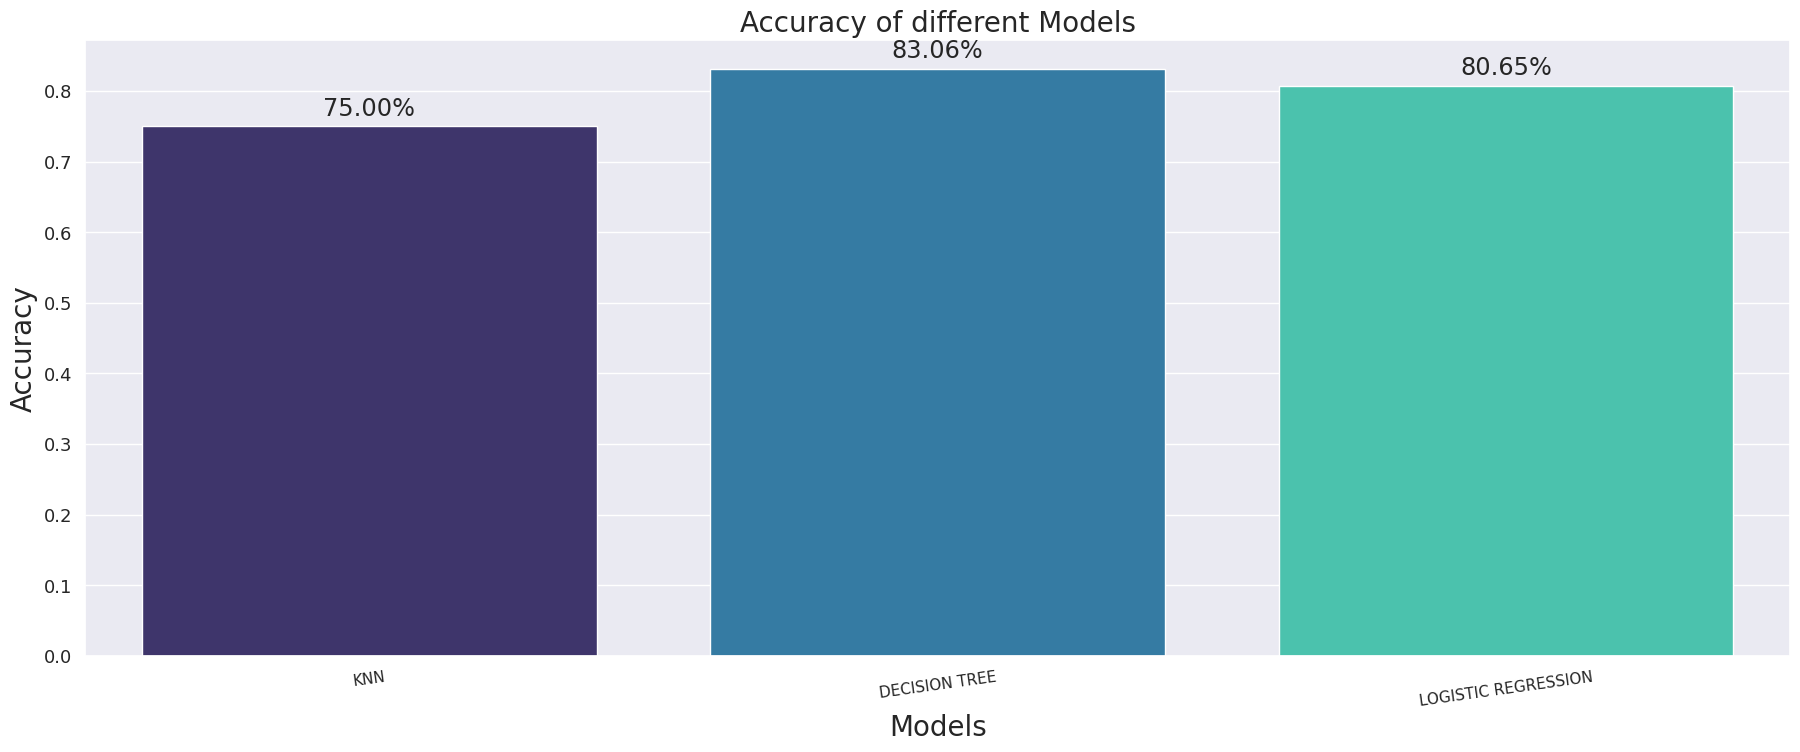

In [255]:
models = ["KNN", "DECISION TREE", "LOGISTIC REGRESSION"]
accuracies = [knn_score, dec_score, lg_score]

sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='x-large')

plt.show()


## 3.5. BUILDING MODEL IN CASE OF KEEPING `date`.

The next question here is whether the `date` variable that we removed in the previous case affects the accuracy of the models and helps them predict more accurately. For example, our weather is affected by each season of the year, so we continue to build the model with the dataset without removing the `date` variable to test this assumption.

In [256]:
# Load the CSV file into a DataFrame
df_date = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
print(data.head())


         date  precipitation  temp_max  temp_min  wind  weather  \
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle   
1  2012-01-02           10.9      10.6       2.8   4.5     rain   
2  2012-01-03            0.8      11.7       7.2   2.3     rain   
3  2012-01-04           20.3      12.2       5.6   4.7     rain   
4  2012-01-05            1.3       8.9       2.8   6.1     rain   

   weather_encoded  
0                0  
1                2  
2                2  
3                2  
4                2  


In [257]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


First, we convert the data type in the variable `date` from string to data type `Datetime`. Then remove the day and year attributes in `date`, extract and keep the month attribute because usually the weather often depends on the seasons of the year and the seasons of the year also change by month.

In [258]:
df_date.date = pd.to_datetime(df_date.date).dt.month
df_date.date

0        1
1        1
2        1
3        1
4        1
        ..
1456    12
1457    12
1458    12
1459    12
1460    12
Name: date, Length: 1461, dtype: int32

We rename the variable `date` to `month` to match the data field it stores.

In [259]:
df_date = df_date.rename(columns = {'date':'month'})
df_date.head()

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,drizzle
1,1,10.9,10.6,2.8,4.5,rain
2,1,0.8,11.7,7.2,2.3,rain
3,1,20.3,12.2,5.6,4.7,rain
4,1,1.3,8.9,2.8,6.1,rain


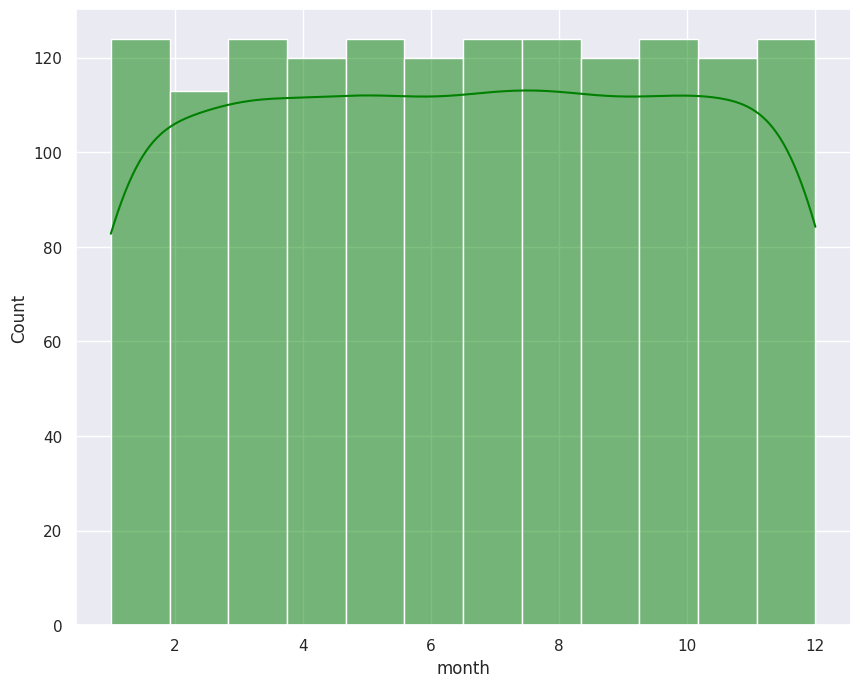

In [260]:
# Set the style to "darkgrid"
sns.set(style="darkgrid")

# Create a figure and axes object with a specified size
fig, axs = plt.subplots(figsize=(10, 8))

# Create a histogram plot of the "month" column in the "df_date" dataframe with a kernel density estimate
plot = sns.histplot(data=df_date, x="month", kde=True, color='green')


### 3.5.1. DATA PROCESSING AND CLEANING.

Similar to the previous section, we will also start processing and cleaning the data before building predictive models. This step has been done in quite detail in the above presentation, so we will not repeat it in this step. These include: removing outliers, dealing with skewed distributions, encoding `weather` variable data, and decomposing the dataset into train and test sets.

In [261]:
# Select only numeric columns for quartile calculation and outlier removal
numeric_columns_date = df_date.select_dtypes(include=['float64', 'int64']).columns

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for numeric columns
Q1_date = df_date[numeric_columns_date].quantile(0.25)
Q3_date = df_date[numeric_columns_date].quantile(0.75)
IQR_date = Q3_date - Q1_date

# Calculate lower and upper bounds for outlier detection
lower_bound_date = Q1_date - 1.5 * IQR_date
upper_bound_date = Q3_date + 1.5 * IQR_date

# Remove outliers using the IQR method
df_date = df_date[~((df_date[numeric_columns_date] < lower_bound_date) | (df_date[numeric_columns_date] > upper_bound_date)).any(axis=1)]

# Print the resulting DataFrame after outlier removal
print(df_date)


      month  precipitation  temp_max  temp_min  wind  weather
0         1            0.0      12.8       5.0   4.7  drizzle
2         1            0.8      11.7       7.2   2.3     rain
4         1            1.3       8.9       2.8   6.1     rain
5         1            2.5       4.4       2.2   2.2     rain
6         1            0.0       7.2       2.8   2.3     rain
...     ...            ...       ...       ...   ...      ...
1455     12            0.0       4.4       0.0   2.5      sun
1457     12            1.5       5.0       1.7   1.3     rain
1458     12            0.0       7.2       0.6   2.6      fog
1459     12            0.0       5.6      -1.0   3.4      sun
1460     12            0.0       5.6      -2.1   3.5      sun

[1233 rows x 6 columns]


In [262]:

df_date.precipitation=np.sqrt(df_date.precipitation)
df_date.wind=np.sqrt(df_date.wind)

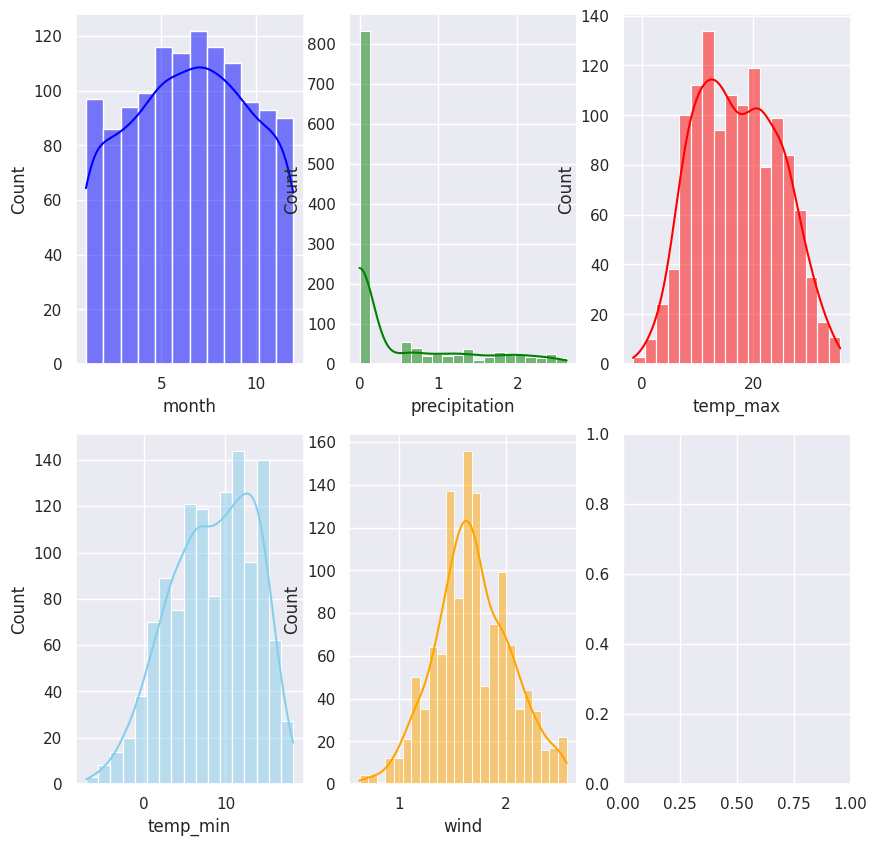

In [263]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

plots = ["month", "precipitation", "temp_max", "temp_min", "wind"]

for i, plot in enumerate(plots):
    sns.histplot(data=df_date, x=plot, kde=True, ax=axs[i//3, i%3], color=["blue", "green", "red", "skyblue", "orange"][i])

Next, we encode the weather conditions into values ​​from 0-4, then decompose the data into train and test sets.

In [264]:
# Create a LabelEncoder object
lc_date = LabelEncoder()

# Encode the "weather" column of the DataFrame and replace it with the encoded values
df_date["weather"] = lc_date.fit_transform(df_date["weather"])

# Display the first few rows of the DataFrame to confirm the encoding
df_date.head()

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.000000,12.8,5.0,2.167948,0
2,1,0.894427,11.7,7.2,1.516575,2
4,1,1.140175,8.9,2.8,2.469818,2
5,1,1.581139,4.4,2.2,1.483240,2
6,1,0.000000,7.2,2.8,1.516575,2


In [265]:
# Extract the feature and target variables from the DataFrame
# Convert the features to integers and exclude the "weather" column
x_date = df_date.loc[:, df_date.columns != "weather"].astype(int).values

# Get the target variable as an array of values
y_date = df_date["weather"].values


In [266]:
# Split the "x_date" and "y_date" datasets into training and testing sets
# with a test size of 0.1 (10% of the data) and a random state of 2 for reproducibility
x_train_date, x_test_date, y_train_date, y_test_date = train_test_split(x_date, y_date, test_size=0.1, random_state=2)


### 3.5.2. K-NEIGHBOR NEAREST CLASSIFIER.

In [267]:
# Create a KNeighborsClassifier object
knn_date = KNeighborsClassifier()

# Fit the model to the training data
knn_date.fit(x_train_date, y_train_date)

# Compute the accuracy score on the test data
knn_date_score = knn_date.score(x_test_date, y_test_date)

# Print the accuracy score
print("KNN Accuracy (with month column):", knn_date_score)


KNN Accuracy (with month column): 0.7338709677419355


In [268]:
# Use the KNN model to predict the target variable for the test set
y_pred_knn_date = knn_date.predict(x_test_date)

# Compute the confusion matrix for the KNN model predictions
conf_matrix_knn_date = confusion_matrix(y_test_date, y_pred_knn_date)

# Print the confusion matrix to the console
print("Confusion Matrix (with month column)")
print(conf_matrix_knn_date)


Confusion Matrix (with month column)
[[ 0  0  0  0  1]
 [ 0  3  3  0  5]
 [ 0  2 24  0  7]
 [ 1  0  0  1  1]
 [ 1  3  9  0 63]]


In [269]:
print('KNN (with month column)\n',classification_report(y_test_date,y_pred_knn_date, zero_division=0))

KNN (with month column)
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.38      0.27      0.32        11
           2       0.67      0.73      0.70        33
           3       1.00      0.33      0.50         3
           4       0.82      0.83      0.82        76

    accuracy                           0.73       124
   macro avg       0.57      0.43      0.47       124
weighted avg       0.74      0.73      0.73       124



We can comment that adding the variable `month` in training the model in this case has increased the reliability of the model using KNN from 0.75 to approximately 0.802.

### 3.5.3. DECISION TREE.

In [270]:
from sklearn.tree import DecisionTreeClassifier

# Import the DecisionTreeClassifier model from sklearn.tree
# Create a list of values for the "max_depth" parameter to test
max_depth_range_date = list(range(1, 8))

# Loop through each value of "max_depth" in the list
for depth in max_depth_range_date:
  # Create a DecisionTreeClassifier model with the current value of "max_depth",
  # a fixed "max_leaf_nodes" value of 15, and a fixed "random_state" value of 0
  dec_date = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
  
  # Fit the model to the training data
  dec_date.fit(x_train_date, y_train_date)
  
  # Evaluate the model's accuracy on the test data
  dec_date_score = dec_date.score(x_test_date, y_test_date)
  
  # Print the accuracy score to the console, along with the current value of "max_depth"
  print("Decision Tree Accuracy (with month column) for max_depth=", depth, ": ", dec_date_score)


Decision Tree Accuracy (with month column) for max_depth= 1 :  0.8064516129032258
Decision Tree Accuracy (with month column) for max_depth= 2 :  0.8145161290322581
Decision Tree Accuracy (with month column) for max_depth= 3 :  0.8225806451612904
Decision Tree Accuracy (with month column) for max_depth= 4 :  0.8306451612903226
Decision Tree Accuracy (with month column) for max_depth= 5 :  0.7983870967741935
Decision Tree Accuracy (with month column) for max_depth= 6 :  0.8225806451612904
Decision Tree Accuracy (with month column) for max_depth= 7 :  0.7983870967741935


In [271]:
from sklearn.metrics import confusion_matrix

# Use the Decision Tree model to predict the target variable for the test set
y_pred_dec_date = dec_date.predict(x_test_date)

# Compute the confusion matrix for the Decision Tree model predictions
conf_matrix_dec_date = confusion_matrix(y_test_date, y_pred_dec_date)

# Print the confusion matrix to the console
print("Confusion Matrix (with month column)")
print(conf_matrix_dec_date)


Confusion Matrix (with month column)
[[ 0  0  0  0  1]
 [ 0  0  2  0  9]
 [ 0  0 26  0  7]
 [ 0  0  1  2  0]
 [ 0  0  5  0 71]]


In [272]:
print('Decision Tree (with month column)\n',classification_report(y_test_date,y_pred_dec_date, zero_division=0))

Decision Tree (with month column)
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.76      0.79      0.78        33
           3       1.00      0.67      0.80         3
           4       0.81      0.93      0.87        76

    accuracy                           0.80       124
   macro avg       0.51      0.48      0.49       124
weighted avg       0.72      0.80      0.76       124



Accuracy has decreased in this case

### 3.5.4. LOGISTIC REGRESSION.

In [273]:
from sklearn.linear_model import LogisticRegression

# Create a new logistic regression model for the "x_date" and "y_date" datasets
lg_date = LogisticRegression()

# Fit the logistic regression model to the training data
lg_date.fit(x_train_date, y_train_date)

# Use the logistic regression model to predict the target variable for the test set
lg_date_score = lg_date.score(x_test_date, y_test_date)

# Print the accuracy score of the logistic regression model to the console
print("Logistic Accuracy (with month column): ", lg_date_score)


Logistic Accuracy (with month column):  0.8064516129032258


/home/yankee/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [274]:
from sklearn.metrics import confusion_matrix

# Use the logistic regression model to predict the target variable for the test set
y_pred_lg_date = lg_date.predict(x_test_date)

# Compute the confusion matrix for the logistic regression model predictions
conf_matrix_date = confusion_matrix(y_test_date, y_pred_lg_date)

# Print the confusion matrix to the console
print("Confusion Matrix (with month column)")
print(conf_matrix_date)


Confusion Matrix (with month column)
[[ 0  0  0  0  1]
 [ 0  0  2  0  9]
 [ 0  0 26  0  7]
 [ 0  0  3  0  0]
 [ 0  0  2  0 74]]


In [275]:
print('Logistic Regression (with month column)\n',classification_report(y_test_date,y_pred_lg_date, zero_division=0))

Logistic Regression (with month column)
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.79      0.79      0.79        33
           3       0.00      0.00      0.00         3
           4       0.81      0.97      0.89        76

    accuracy                           0.81       124
   macro avg       0.32      0.35      0.33       124
weighted avg       0.71      0.81      0.75       124



Based on the above, we can see that adding the variable `month` has increased the reliability of the model using Logistic Regression.

### 3.5.5. CASE OF KEEPING `date` VARIABLE AS YYYY-MM-DD FORMAT.
One last test is the case where we keep the `date` variable in the format YYYY-MM-DD to check its effect on the final result.

In [276]:
# Load the CSV file into a DataFrame
df3 = pd.read_csv("dataset.csv")

# Display the first five rows of the DataFrame
print(df3.head())


         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [277]:
# Select only numeric columns for quartile calculation and outlier removal
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for numeric columns
Q1 = df3[numeric_columns].quantile(0.25)
Q3 = df3[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers using the IQR method
df3 = df3[~((df3[numeric_columns] < lower_bound) | (df3[numeric_columns] > upper_bound)).any(axis=1)]

# Print the resulting DataFrame after outlier removal
print(df3)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
2     2012-01-03            0.8      11.7       7.2   2.3     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
5     2012-01-06            2.5       4.4       2.2   2.2     rain
6     2012-01-07            0.0       7.2       2.8   2.3     rain
...          ...            ...       ...       ...   ...      ...
1455  2015-12-26            0.0       4.4       0.0   2.5      sun
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1233 rows x 6 columns]


In [278]:
# Handling skewed distributions.
df3.precipitation=np.sqrt(df3.precipitation)
df3.wind=np.sqrt(df3.wind)

In [279]:
lc = LabelEncoder()
df3["weather"]=lc.fit_transform(df3["weather"])
df3.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,12.8,5.0,2.167948,0
2,2012-01-03,0.894427,11.7,7.2,1.516575,2
4,2012-01-05,1.140175,8.9,2.8,2.469818,2
5,2012-01-06,1.581139,4.4,2.2,1.483240,2
6,2012-01-07,0.000000,7.2,2.8,1.516575,2


In [280]:
df3.date = pd.to_datetime(df3.date)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1233 non-null   datetime64[ns]
 1   precipitation  1233 non-null   float64       
 2   temp_max       1233 non-null   float64       
 3   temp_min       1233 non-null   float64       
 4   wind           1233 non-null   float64       
 5   weather        1233 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 67.4 KB


In [281]:
x_df3 = ((df3.loc[:,df3.columns!="weather"]).astype(np.int64)).values[:,0:]
y_df3 = df3["weather"].values

In [282]:
x_train_df3,x_test_df3,y_train_df3,y_test_df3 = train_test_split(x_df3,y_df3,test_size=0.1,random_state=2)

**K-NEIGHBOR NEAREST CLASSIFIER.**

In [283]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNN model
knn_df3 = KNeighborsClassifier()

# Train the KNN model using the training data
knn_df3.fit(x_train_df3, y_train_df3)

# Evaluate the accuracy of the KNN model on the test data
knn_score_df3 = knn_df3.score(x_test_df3, y_test_df3)

# Print the KNN model accuracy to the console
print("KNN Accuracy:", knn_score_df3)


KNN Accuracy: 0.6290322580645161


* The K-Neighbor Nearest Classifier model has reduced the accuracy to only 0.629. Compared to the two cases above, this case gives the worst results.

**DECISION TREE.**

In [284]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a list of max depth values to try
max_depth_range = list(range(1, 8))

# Train and evaluate a decision tree model with varying max depth values
for depth in max_depth_range:
    
    # Create a decision tree classifier with the current max depth value and other parameters
    dec_df3 = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
    
    # Train the decision tree model on the training data
    dec_df3.fit(x_train_df3, y_train_df3)
    
    # Compute the accuracy of the decision tree model on the testing data
    dec_score_df3 = dec_df3.score(x_test_df3, y_test_df3)
    
    # Print the accuracy score to the console
    print("Decision Tree Accuracy: ", dec_score_df3)


Decision Tree Accuracy:  0.8064516129032258
Decision Tree Accuracy:  0.8145161290322581
Decision Tree Accuracy:  0.7903225806451613
Decision Tree Accuracy:  0.8467741935483871
Decision Tree Accuracy:  0.8145161290322581
Decision Tree Accuracy:  0.8145161290322581
Decision Tree Accuracy:  0.8145161290322581


* Decision Tree model with variable `date` preserved in YYYY-MM-DD format gave the model with confidence 0.8387 with parameter max_depth = 4. This is the model with the best reliability among them. the results we have.

**LOGISTIC REGRESSION**

In [285]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model object
lg_df3 = LogisticRegression()

# Train the logistic regression model on the training data
lg_df3.fit(x_train_df3, y_train_df3)

# Evaluate the logistic regression model on the test data
# by computing the accuracy score
lg_score_df3 = lg_df3.score(x_test_df3, y_test_df3)

# Print the accuracy score to the console
print("Logistic Accuracy : ", lg_score_df3)


Logistic Accuracy :  0.008064516129032258


/home/yankee/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model above only gives 0.008 accuracy, which is an extremely low result.

**Conclusion: When keeping the date variable in YYYY-MM-DD format, we got a higher accuracy than other cases of 0.83.87 in the model using Decision Tree. But in this case there will be an unreasonable thing that we predict the weather but rely on an exact date-month-year (YYYY-MM-DD), this is a bit impractical compared to relying solely on monthly (MM) information.**

# **4.Model Testing**

Here, we will use a typical model from the number of models built above to test the results. We will choose a model built with Decision Tree with variable `month` that stores month information extracted from `date` variable, with parameter max_depth = 4. This model has an accuracy of 0.8387.

In [286]:
# Create a decision tree classifier with the current max depth value and other parameters
dec_df3 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)

# Train the decision tree model on the training data
dec_df3.fit(x_train_df3, y_train_df3)

# Compute the accuracy of the decision tree model on the testing data
dec_score_df3 = dec_df3.score(x_test_df3, y_test_df3)

# Print the accuracy score to the console
print("Decision Tree Accuracy: ", dec_score_df3)

Decision Tree Accuracy:  0.8467741935483871


In [287]:
for i in (range(len(y_test_df3))):
    print("----------------------------------")
    ot = dec_df3.predict([x_test_df3[i]])
    if(ot==0):
        print("The weather predict is: Drizzle")
    elif(ot==1):
        print("The weather predict is: Fog")
    elif(ot==2):
        print("The weather predict is: Rain")
    elif(ot==3):
        print("The weather predict is: Snow")
    else:
        print("The weather predict is: Sun")
    ac = y_test_df3[i]
    if(ac==0):
        print("The weather actual is: Drizzle")
    elif(ac==1):
        print("The weather actual is: Fog")
    elif(ac==2):
        print("The weather actual is: Rain")
    elif(ac==3):
        print("The weather actual is: Snow")
    else:
        print("The weather actual is: Sun")

----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Snow
The weather actual is: Snow
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Snow
The weather actual is: Snow
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Sun
The weather actual is: Sun
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Rain
The weather actual is: Rain
----------------------------------
The weather predict is: Sun
The weather actual is: Sun


In [288]:
input=[[10,0.3,15.6,0.0,2.5]]
ot = dec_df3.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Sun


Visit [AiHubProjects](https://aihubprojects.com/) for more AI Projects and Tutorials